# MNIST Classification with Convolutional Networks

In [1]:
# Setup
import tensorflow as tf
import keras

import numpy as np
import datetime

import os
import sys
import imp

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import models as M
import utils as U

imp.reload(M)
imp.reload(U)

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_19487/3341513761.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'utils' from '/Users/mghifary/Work/Code/AI/keras-poc/utils.py'>

### Constants

In [2]:
EPOCH = 30
BATCH = 128

DATADIR = "/Users/mghifary/Work/Code/AI/data"
MODELDIR = "/Users/mghifary/Work/Code/AI/models"

### Load and preprocess dataset

In [3]:
# Load dataset
data_path = os.path.join(DATADIR, "mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(data_path)
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshape
x_train = np.expand_dims(x_train, axis=-1) 
x_test = np.expand_dims(x_test, axis=-1)

(n_train, dx1, dx2, c) = x_train.shape
n_test = x_test.shape[0]

ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Shuffle and batch
ds_train = ds_train.shuffle(buffer_size=1024).batch(BATCH)
ds_test = ds_test.batch(BATCH)

### Visualize data

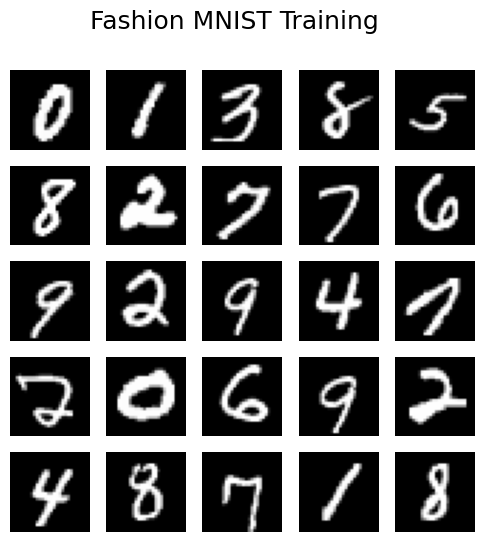

In [4]:
# Visualize training samples
U.visualize_dataset(ds_train, title="MNIST Training", n_samples=25)

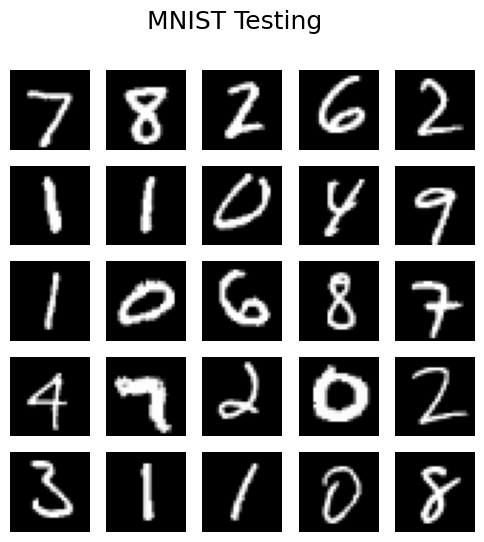

In [10]:
# Visualize test samples
U.visualize_dataset(ds_test, title="MNIST Testing", n_samples=25)

### Build NN model

In [6]:
# Subclassing API
# model = M.ConvNet(num_classes=10, input_shape=(dx1, dx2, c))
# model.build(input_shape=(None, dx1, dx2, c))
# model.summary()

# model = M.ConvNetSeq(num_classes=10, input_shape=(dx1, dx2, c))
model = M.LeNet5Seq(num_classes=10, input_shape=(dx1, dx2, c))
model.summary()

Model: "le_net5_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               

#### Train model

In [7]:
# Loss and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = keras.metrics.SparseCategoricalAccuracy()
optimizer = keras.optimizers.legacy.Adam(learning_rate=3e-4)

In [8]:
# Define callback for Tensorboard and Model Checkpoint
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="./logs/conv-mnist/" + current_time,
    update_freq="epoch"
)

checkpoint_dir = os.path.join(MODELDIR, f"conv-mnist-{current_time}")

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir, "weights-{epoch:02d}-{val_loss:.2f}.hdf5")
modelcp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True
)

In [9]:
# Compile and run training
model.compile(optimizer=optimizer, loss=loss_fn, metrics=[accuracy])
model.fit(ds_train, epochs=EPOCH, validation_data=ds_test, callbacks=[tensorboard_callback, modelcp_callback])

Epoch 1/30
469/469 [==============================] - 11s 23ms/step - loss: 0.3214 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.0897 - val_sparse_categorical_accuracy: 0.9727
Epoch 2/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9741
Epoch 3/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0438 - val_sparse_categorical_accuracy: 0.9854
Epoch 4/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9884
Epoch 5/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.0366 - val_sparse_categorical_accuracy: 0.9879
Epoch 6/30
469/469 [==============================] - 11s 25ms/step - loss: 0.0284 - spars